<a href="https://colab.research.google.com/github/pk38/DimensionalBiasDetection/blob/dev_div/EDA_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import pylab as plt
import numpy as np
import random


In [ ]:
#!pip install hvplot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 13.4 MB/s eta 0:00:00


In [ ]:
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
%cd /content/drive/Shared drives/CSE293ResearchProject/ml-latest-small


/content/drive/Shared drives/CSE293ResearchProject/ml-latest-small


In [ ]:
spreadsheet1 = pd.read_csv('ratings.csv')
pd.set_option('display.max_columns', None)
spreadsheet1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
#Datatypes

spreadsheet1.dtypes


userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [ ]:
#Number of unique values in each field

spreadsheet1[['userId', 'movieId', 'rating']].nunique()


userId      610
movieId    9724
rating       10
dtype: int64

<Axes: xlabel='rating', ylabel='count'>

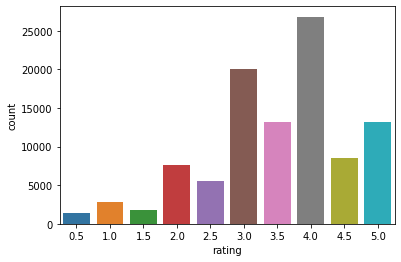

In [ ]:
#Plot the unique values

sns.countplot(x=spreadsheet1['rating'])


In [ ]:
#Find null values

spreadsheet1.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
spreadsheet3 = pd.read_csv('movies.csv')
pd.set_option('display.max_columns', None)
spreadsheet3

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
#Datatypes

spreadsheet3.dtypes

movieId     int64
title      object
genres     object
dtype: object

{'Adventure': 1263, 'Animation': 611, 'Children': 664, 'Comedy': 3756, 'Fantasy': 779, 'Romance': 1596, 'Drama': 4361, 'Action': 1828, 'Crime': 1199, 'Thriller': 1894, 'Horror': 978, 'Mystery': 573, 'Sci-Fi': 980, 'War': 382, 'Musical': 334, 'Documentary': 440, 'IMAX': 158, 'Western': 167, 'Film-Noir': 87, '(no genres listed)': 34}
34


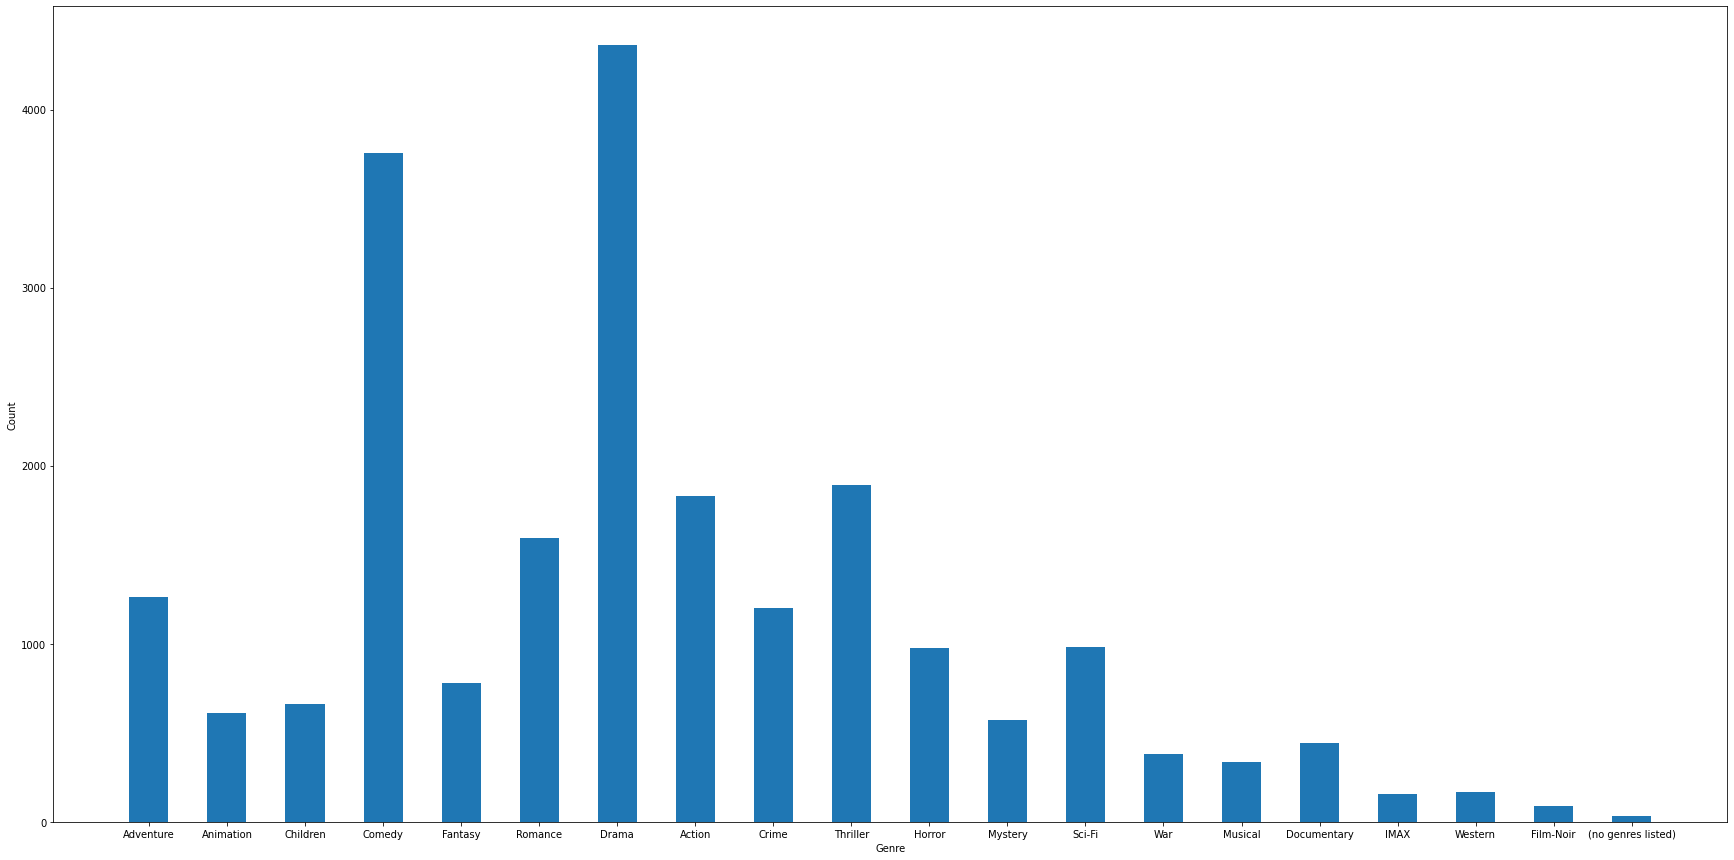

In [ ]:
#Number of unique values in Genre Field

genreValuesDict = {}
for column in spreadsheet3['genres']:
  arr = column.split("|")
  for string in arr:
    try :
      genreValuesDict[string] = genreValuesDict[string] + 1
    except KeyError:
      genreValuesDict[string] = 1
print(genreValuesDict)

#Verifying the dictionary implementation
print((spreadsheet3['genres'] == '(no genres listed)').sum())

names = list(genreValuesDict.keys())
values = list(genreValuesDict.values())

plt.figure(figsize = (30,15))
plt.bar(range(len(genreValuesDict)), values, tick_label=names, width = 0.5, linewidth=1.5)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [ ]:
#Splitting


genreValues = []
for column in spreadsheet3['genres']:
  string_value = str(column)
  tokens = string_value.split('|')
  genreValues.append(tokens)

spreadsheet3['genres'] = genreValues
spreadsheet3

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


In [ ]:
ratings = pd.read_csv('ratings.csv')
pd.set_option('display.max_columns', None)
correlation_matrix = pd.DataFrame()
correlation_matrix = ratings
del correlation_matrix['timestamp']
correlation_matrix




,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [ ]:
# correlation_matrix['Average Rating'] = ratings.groupby('userId')['rating'].mean()
# correlation_matrix['Number of Movies Rating'] = ratings.groupby('userId')['movieId'].count()
# correlation_matrix['CountSoldbyMonth'] = correlation_matrix.groupby(['userId','movieId']).transform('count')

# pd.set_option('display.max_columns', None)
# correlation_matrix

df_summed = correlation_matrix.groupby('userId', as_index=False)['rating'].mean()
df_summed1 = correlation_matrix.groupby('userId', as_index=False)['movieId'].count()
result = pd.merge(df_summed, df_summed1, on='userId')
result.columns = ['User ID', 'Average Rating', 'Number of Movies Watched']
result

,User ID,Average Rating,Number of Movies Watched
0,1,4.366379,232
1,2,3.948276,29
2,3,2.435897,39
3,4,3.555556,216
4,5,3.636364,44
...,...,...,...
605,606,3.657399,1115
606,607,3.786096,187
607,608,3.134176,831
608,609,3.270270,37


In [ ]:
ratings = pd.read_csv('ratings.csv')


all_data = ratings.merge(spreadsheet3)
all_data

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,5,1,4.0,847434962,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
2,7,1,4.5,1106635946,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
3,15,1,2.5,1510577970,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
4,17,1,4.5,1305696483,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),"[Action, Thriller]"
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),"[Action, Crime, Drama]"
100833,610,160836,3.0,1493844794,Hazard (2005),"[Action, Drama, Thriller]"
100834,610,163937,3.5,1493848789,Blair Witch (2016),"[Horror, Thriller]"


In [ ]:

def getNoOfGenresWatchedPerUser(user_data):
  # get all genre values for one user
  genres = []
  for idx in user_data.index:
    genre_list = (user_data['genres'][idx])
    for genre in genre_list:
      genres.append(genre)
  genre_set = set(genres)
  return genre_set

genre_watched = pd.DataFrame()
userID = []
genreCount = []

for user in all_data['userId'].unique():
  user_data = all_data[all_data['userId'] == user]
  genreRatingForUser = getNoOfGenresWatchedPerUser(user_data)
  userID.append(user)
  genreCount.append(len(genreRatingForUser))

genre_watched['User ID'] = userID
genre_watched['Genre Count'] = genreCount
genre_watched



,User ID,Genre Count
0,1,17
1,5,17
2,7,18
3,15,17
4,17,19
...,...,...
605,506,18
606,397,12
607,556,14
608,175,8


In [ ]:
result_1 = pd.merge(result, genre_watched, on='User ID')
result_1.iloc[20:30]



,User ID,Average Rating,Number of Movies Watched,Genre Count
20,21,3.260722,443,19
21,22,2.571429,119,19
22,23,3.648760,121,18
23,24,3.650000,110,16
24,25,4.807692,26,14
25,26,3.238095,21,13
26,27,3.548148,135,18
27,28,3.020175,570,19
28,29,4.141975,81,19
29,30,4.735294,34,15


                          Average Rating  Number of Movies Watched  \
Average Rating                  1.000000                 -0.380965   
Number of Movies Watched       -0.380965                  1.000000   
Genre Count                    -0.416086                  0.660957   

                          Genre Count  
Average Rating              -0.416086  
Number of Movies Watched     0.660957  
Genre Count                  1.000000  


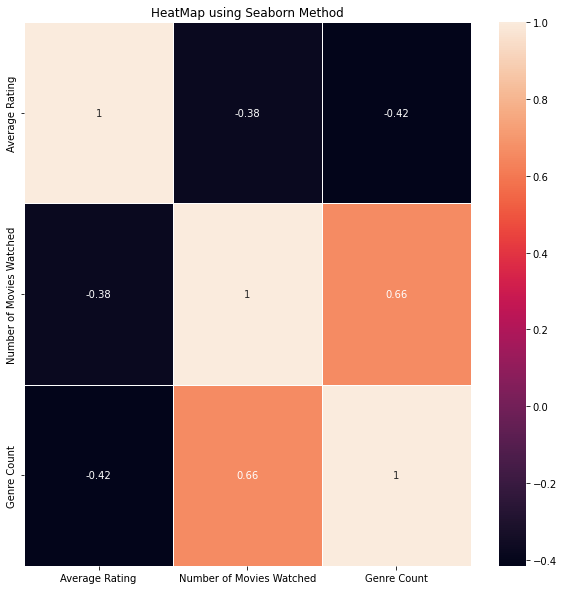

In [ ]:
#del result_1['User ID']

# sns.barplot(x=result_1.iloc[20:30]['User ID'], y=result_1.iloc[20:30]['Average Rating',	'Number of Movies Watched',	'Genre Count'])
corr_matrix = result_1.iloc[20:50].corr()
print(corr_matrix)
# plt.figure(figsize=(10, 10))

# sns.heatmap(corr_matrix)

# 3. Plot the heatmap
plt.figure(figsize=(10,10))
heat_map = sns.heatmap( corr_matrix, linewidth = 1 , annot = True)
plt.title( "HeatMap using Seaborn Method" )
plt.show()
# sns.heatmap(result_1.iloc[20:50].corr(), cmap="YlGnBu", annot=True);

# plt.figure(figsize=(15, 15))
# sns.heatmap(result_1.iloc[20:50], annot=True, cmap="YlGnBu", linewidths=.2)

# labels = ['Average Rating',	'Number of Movies Watched',	'Genre Count']
# plt.subplots_adjust(left=0.1, bottom=0.15, right=0.99, top=0.95)
# plt.imshow(result_1.iloc[20:50], cmap=plt.cm.get_cmap("Reds"), interpolation="nearest", aspect = "auto")
# plt.xticks(range(len(labels)), labels, rotation=90, va="top", ha="center")
# plt.colorbar()

# plt.show()

# column_labels = ['Average Rating',	'Number of Movies Watched',	'Genre Count']
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 10),
#                                gridspec_kw={'width_ratios': [10, 1], 'wspace': 0.02, 'bottom': 0.14})
# cmap = sns.diverging_palette(20, 145)
# sns.heatmap(result_1.iloc[20:50][result_1.iloc[20:50].columns[:-1]], cmap=cmap, vmin=0, vmax=100, annot=True, fmt='.0f', annot_kws={'fontsize': 10},
#             lw=0.6, xticklabels=column_labels, cbar=False, ax=ax1)
# sns.heatmap(result_1.iloc[20:50][result_1.iloc[20:50].columns[-1:]], cmap=cmap, vmin=0, vmax=1100, annot=True, fmt='.0f', annot_kws={'fontsize': 10},
#             lw=0.6, yticklabels=[], cbar=False, ax=ax2)
# ax2.set_ylabel('')
# ax2.tick_params(axis='x', labelrotation=90)
# plt.show()

In [ ]:
correlation_matrix_movie_user = pd.DataFrame()
movie_data = pd.DataFrame()
temp = pd.DataFrame()
correlation_matrix_movie_user = all_data[['userId',	'movieId',	'rating']]
correlation_matrix_movie_user


# users = []
# users.append(correlation_matrix_movie_user['userId'].sample(n = 4))
# print(users)

unique_users = list(set(correlation_matrix_movie_user['userId'].tolist()))
users_100 = random.sample(unique_users, 100)

unique_movie = list(set(correlation_matrix_movie_user['movieId'].tolist()))
movie_100 = random.sample(unique_movie, 100)
print(movie_100)

movie_data = correlation_matrix_movie_user.loc[correlation_matrix_movie_user['movieId'].isin(movie_100)]
temp = movie_data.loc[movie_data['userId'].isin(users_100)]
temp



for col in temp:
  print(temp[col].unique())
  print(len(temp[col].unique()))
# for movie in correlation_matrix_movie_user['movieId'].sample(n = 4):
#   movie_data = correlation_matrix_movie_user[correlation_matrix_movie_user['movieId'] == movie]
  
  # = 
  # user = random.choice(users)
  # print(movie_data['rating'].where(movie_data['userId'] == user))






# user_data = pd.DataFrame(np.random.randn(4, 3), columns=['userId','movieId',	'rating'])

# user_data.hvplot(x='userId', y=['movieId',	'rating'], kind='scatter')

[145283, 93443, 7036, 5135, 101895, 188797, 26593, 128488, 63768, 71156, 145994, 1335, 8015, 5459, 26865, 5680, 4623, 2248, 41724, 79590, 43396, 136562, 136443, 55276, 30825, 3810, 143410, 7258, 110, 118880, 173355, 118706, 4831, 59615, 2177, 802, 184987, 27838, 27193, 27491, 7348, 61132, 27075, 157699, 8057, 3400, 158035, 107348, 115502, 4863, 52299, 180985, 95875, 3386, 2946, 7070, 140038, 3918, 71464, 3608, 5712, 4774, 8464, 8502, 171917, 134528, 494, 33294, 47099, 761, 1440, 54787, 90630, 3146, 7121, 1986, 48593, 5657, 108928, 95858, 170939, 1456, 62344, 87444, 110541, 2287, 228, 7587, 107406, 3599, 7566, 285, 7841, 4235, 6159, 6212, 8239, 4316, 6804, 2118]
[  8  11  18  38  40  62  72  81  96 103 129 133 136 198 202 284 319 322
 323 353 372 380 395 427 464 560 573 577 590  60 177 448  19 297 350 389
 482 492  84 120 321 431 456 477 521 572 341 520 119 153 212 258 352 529
 225 325 424 484 542 152 408]
61
[   110   3386    494    802   5459  47099  55276  59615  71156 145283
    761